In [43]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [27]:
X = np.array([[1, 0], [1, 8]])
y = np.array([4, 0])
b = np.linalg.inv(X.T @ X) @ X.T @ y
b0, b = b[0], np.array([b[1], -1])
b0, b

(4.0, array([-0.5, -1. ]))

In [29]:
# for any 2 points x1 and x2 lying in L, b.T.dot(x1 - x2) equals 0
x1, x2 = np.array([2, 3]), np.array([4, 2])
b @ (x1 - x2)

0.0

In [31]:
# for any point x0 lying in L, b.T.dot(x0) equals - b0
x0 = np.array([3, 2.5])
b @ x0

-4.0

In [33]:
b_norm = b / np.sqrt(b @ b)
b_norm

array([-0.4472136 , -0.89442719])

In [36]:
x1, x2 = np.array([3, 5]), np.array([1, 1])
b_norm @ (x1 - x0), b_norm @ (x2 - x0)

(-2.23606797749979, 2.23606797749979)

In [38]:
(b @ x1 + b0) / np.sqrt(b @ b), (b @ x2 + b0) / np.sqrt(b @ b)

(-2.23606797749979, 2.23606797749979)

In [117]:
points = np.array([[65.,90],[331,21],[483,17],[318,90],[187,152],[192,190],[223,266],[270,259], [339,246],[303,291],
                   [168,256],[222,308],[168,287],[16,286],[197,320],[48,380],[91,390],[192,421],[219,393],[223,434]])
y = np.ones(shape=(points.shape[0]))
y[10:] = -1
colors = ['blue'] * 10 + ['red'] * 10
b0, b = 0., np.array([6., -2.])

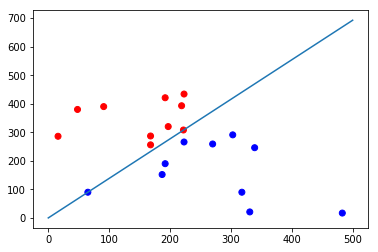

In [120]:
plt.scatter(points[:,0], points[:,1], color=colors)
x0, x1 = 0, 500
y0, y1 = -b[0]*x0/b[1], -b[0]*x1/b[1]
plt.plot([x0, x1], [y0, y1])
misclassified = points[np.sign(points @ b + b0) != y,:]
plt.scatter(misclassified[:,0], misclassified[:,1], color='black')

In [119]:
p = 0.0001
for k in range(1000):
    has_misclassifications = False
    for i in range(points.shape[0]):
        if np.sign(points[i] @ b + b0) != y[i]:
            b += p * y[i] * points[i]
            b0 += p* y[i]
            has_misclassifications = True
    if not has_misclassifications:
        break
print('epochs', k)

epochs 18
